# K-Means

In diesem Notebook schauen wir uns den `K-Means` `Clustering Algorithmus` an.
Clustering gruppiert Daten nach ihrer Ähnlichkeit, **nicht** nach einem Label. Wir verwenden hier daher nicht den Namen (`name`) der Blume, sondern versuchen Blumen anhand ihrer Blütenblätter zu gruppieren.

## Setup

Setup Code muss *nicht* verstanden werden.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [41]:
X = pd.read_csv('data/iris.csv')[['petal length', 'petal width']].rename(columns={
    'petal length': 'petal length (cm)',  # petal = Blütenblatt
    'petal width': 'petal width (cm)',
})

## K-Means

K-Means misst die Distanz zum nächsten Schwerpunkt. Damit dieses Distanz-Messen unabhängig von der Einheit der Messung ist, müssen wir die Daten zuerst `standard skalieren`!

Der Optimierungsalgorithmus von K-Means findet ein lokales Minimum. `sklearn` hat deshalb den Parameter `n_init`, der steuert, wie viele Modelle trainiert werden, das beste Modell wird dann verwendet.

Bei `K-Means` ist die Anzahl Cluster ein Hyperparameter, sprich wir müssen die Zahl definieren, das Modell lernt die Anzahl Cluster **nicht** selbst. Hier wurde `4` gewählt mittels Elbow-Plot (siehe unten).

In [42]:
model = Pipeline([
    ('std', StandardScaler()),
    ('clf', KMeans(
        n_clusters=4,   # Anzahl Cluster ist anhand vom Elbow Plot gewählt (Siehe unten).
        n_init=10       # KMeans mit 10 unterschiedlichen Initialwerten trainieren und beste Clustering merken.
    ))
])
model.fit(X)

Pipeline(steps=[('std', StandardScaler()), ('clf', KMeans(n_clusters=4))])

Visualisierung der gefundenen Cluster auf den Daten.

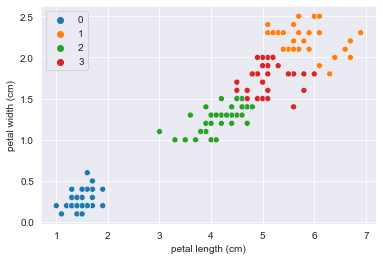

In [43]:
y_hat = model.predict(X)

sns.scatterplot(x=X['petal length (cm)'], y=X['petal width (cm)'], hue=y_hat, palette='tab10')
plt.show()

## Elbow plot

Der Elbow plot ist ein rudimentäres Mittel, um festzustellen, wie viele Clusters sinnvoll sind für die Daten.

Die Idee ist folgende:

1. Wir möchten die Anzahl Clusters klein halten
2. Wir möchten den Loss minimieren

Aber: Der Loss geht runter je mehr Clusters wir haben... Also brauchen wir einen Kompromiss. Der Elbow Plot zeigt uns, wie sich dieser Kompromiss ausspielt, indem es den Loss über die Anzahl Cluster plottet.

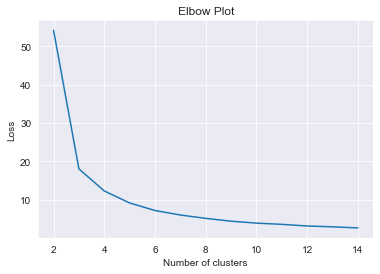

In [50]:
scores = dict()

for k in range(2, 15):
    model = Pipeline([
        # Ich empfehle bei Logistic Regression den StandardScaler vorher anzuwenden, da die Logistic Regression standardmässig regularisiert
        ('std', StandardScaler()),
        ('clf', KMeans(n_clusters=k))
    ])
    model.fit(X)
    scores[k] = -model.score(X)

ax = sns.lineplot(x=scores.keys(), y=scores.values())
plt.title("Elbow Plot")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Loss")
plt.show()